In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
import pandas as pd
import yfinance as yf
from arch import arch_model

In [10]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

In [11]:
df = yf.download(RISKY_ASSET,
                start=START_DATE,
                end=END_DATE,
                adjusted=True)

[*********************100%***********************]  1 of 1 completed


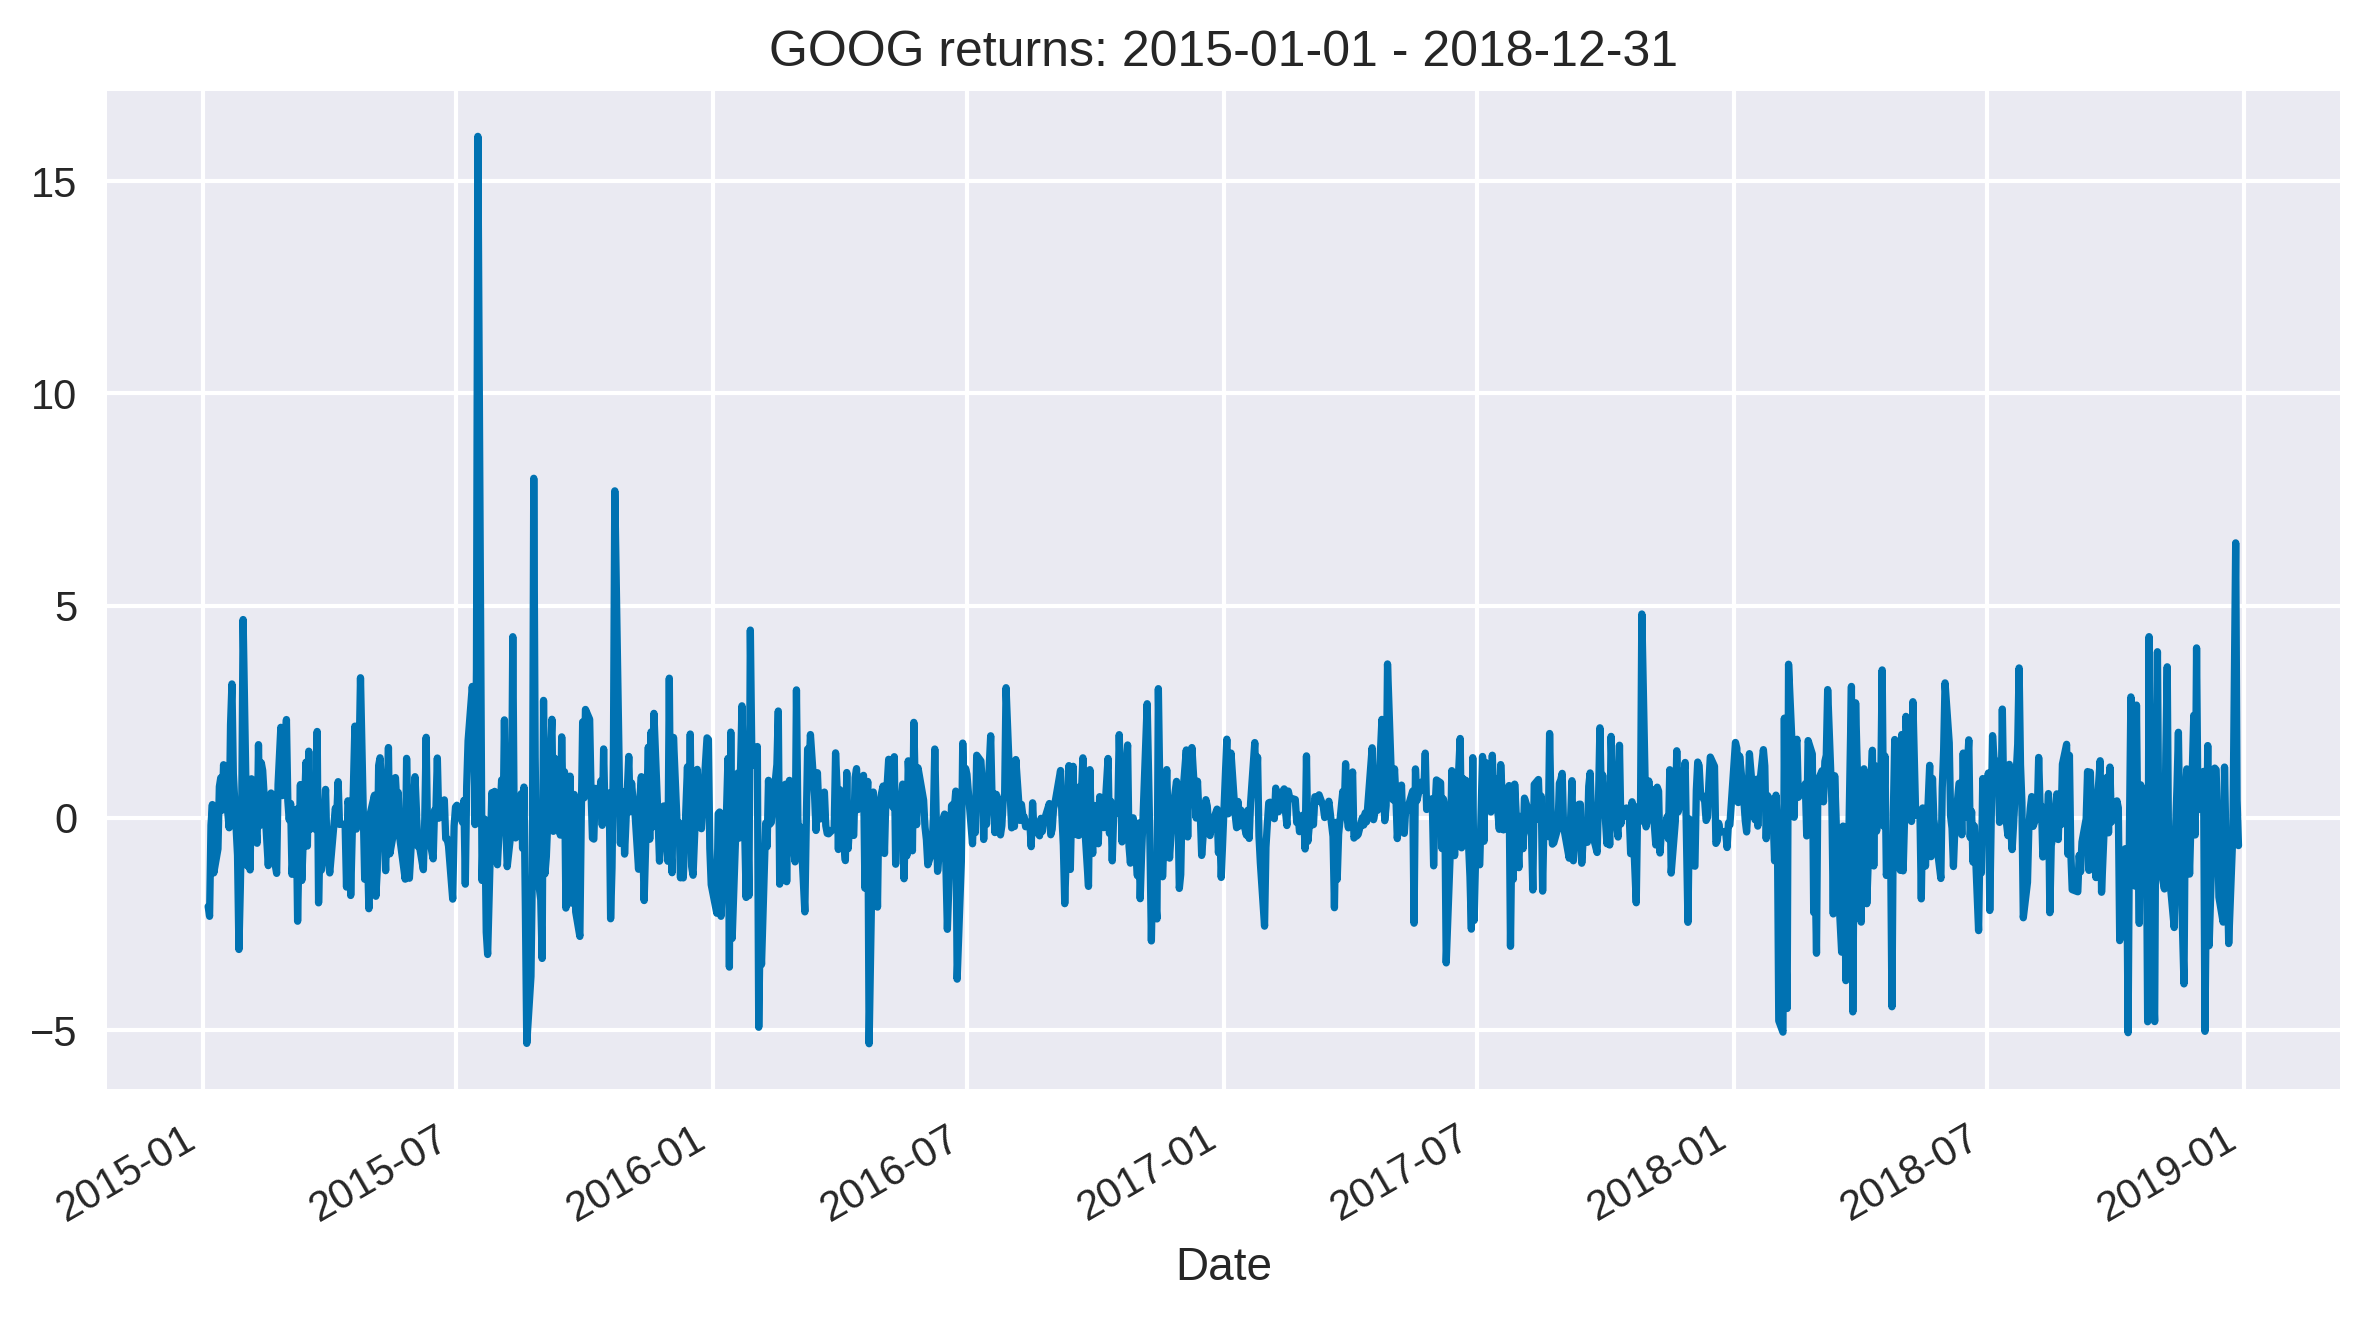

In [12]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
returns.plot(title = f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')
plt.tight_layout()
plt.show()

## modelando ARCH

In [13]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1,o=0,q=0)

In [14]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1799.00
Distribution:                  Normal   AIC:                           3602.00
Method:            Maximum Likelihood   BIC:                           3611.83
                                        No. Observations:                 1004
Date:                Sun, Jun 07 2020   Df Residuals:                     1002
Time:                        18:17:19   Df Model:                            2
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6292      0.167      9.736  2.128e-22   [  1.30

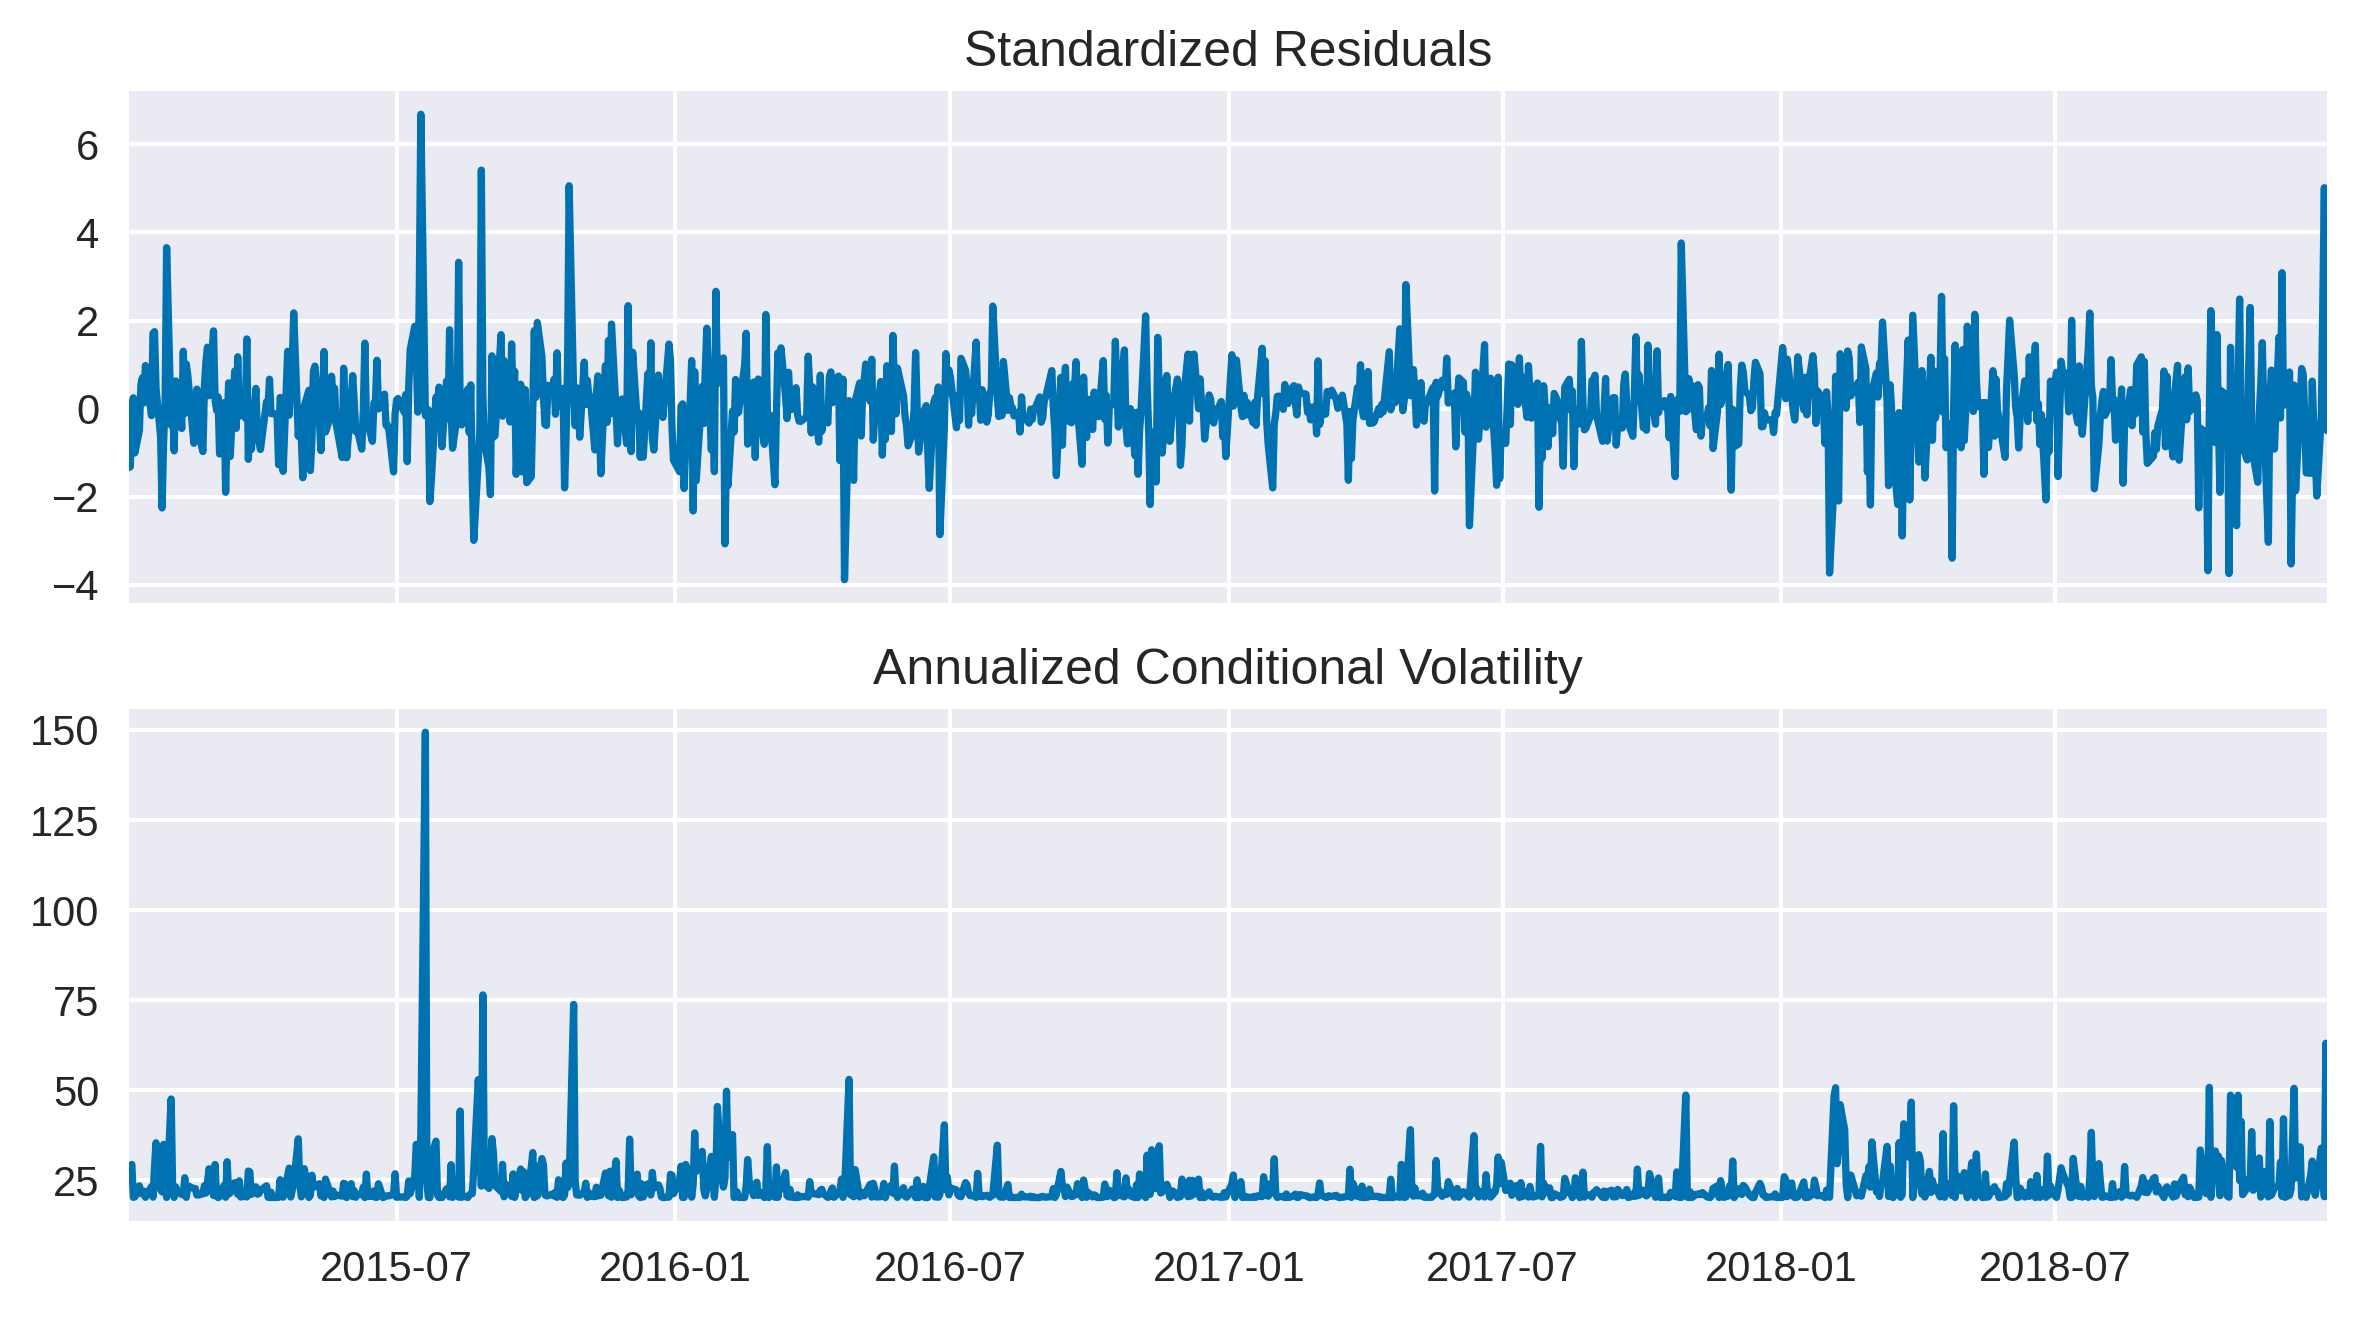

In [16]:
model_fitted.plot(annualize='D')
plt.tight_layout()
plt.show()

## GARCH

In [17]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1,o=0,q=1)

In [18]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1763.46
Distribution:                  Normal   AIC:                           3532.92
Method:            Maximum Likelihood   BIC:                           3547.66
                                        No. Observations:                 1004
Date:                Sun, Jun 07 2020   Df Residuals:                     1001
Time:                        18:26:19   Df Model:                            3
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1793      0.160      1.120      0.263    [ -

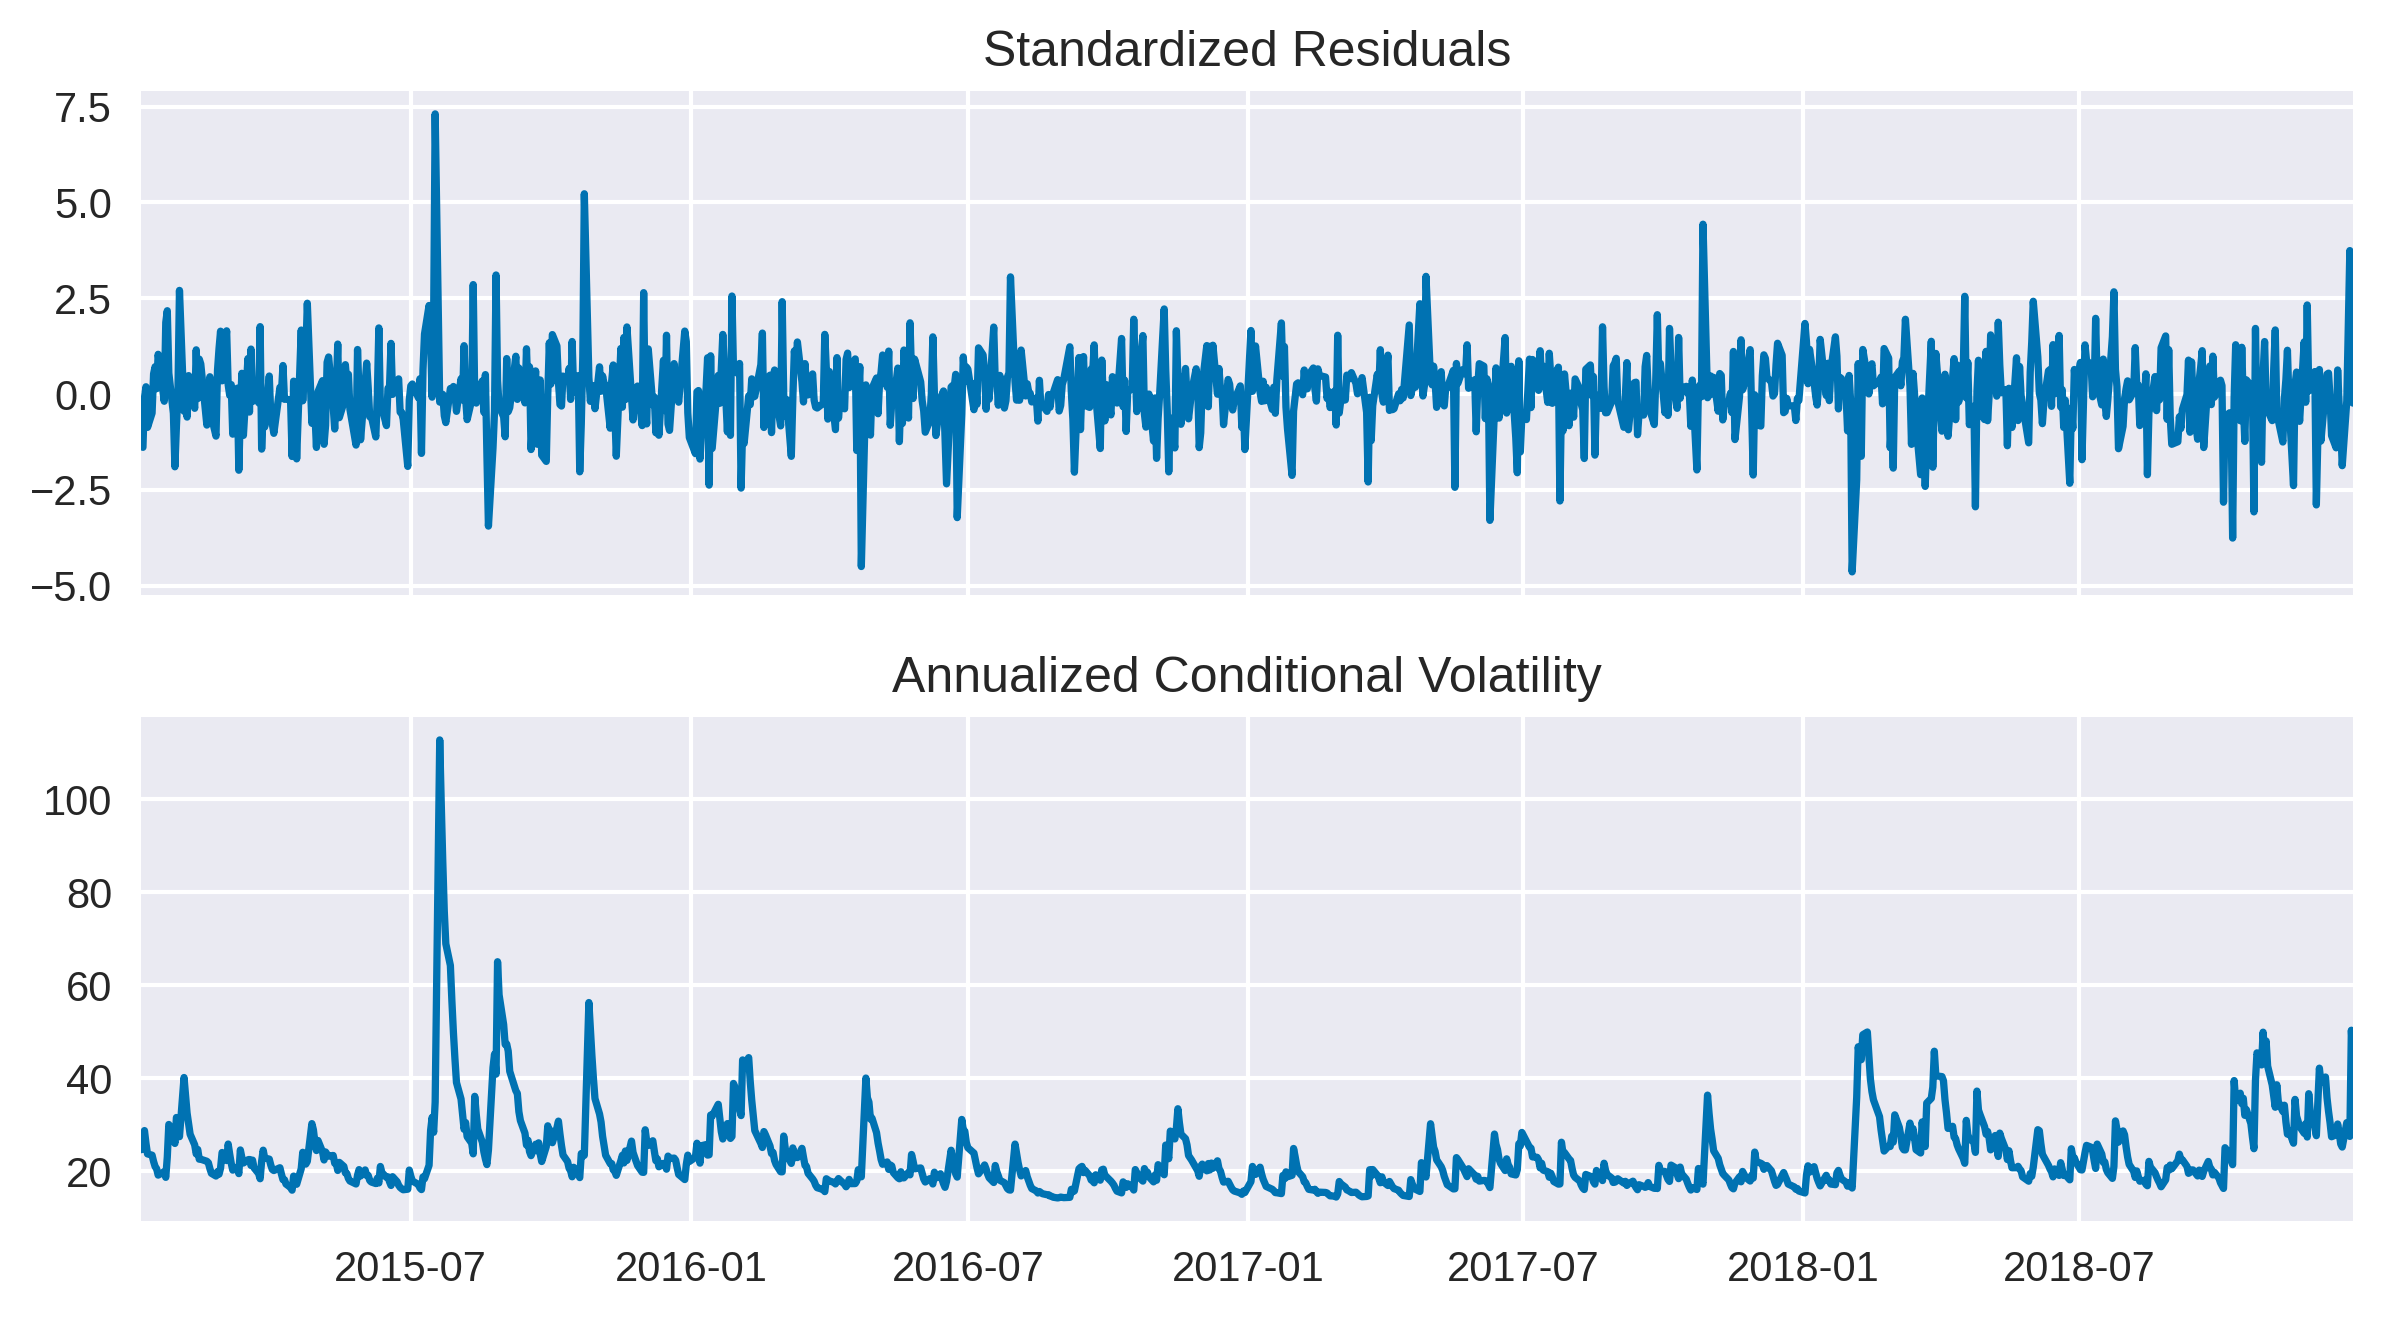

In [19]:
model_fitted.plot(annualize='D')
plt.tight_layout()
plt.show()